# DS Team 5

## In which season should I advertise to whom, It be effective?

## Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결


## Data

### Bicycle Use
- Seoul Government Public Bicycle Use Information (Daily)
- [서울 열린데이터 광장](http://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do)
- We predict users' usage count, exercise amount, usage time, and distance traveled based on the bike-sharing data.
- 대여일자	대여시간	대여소번호	대여소명	대여구분코드	성별	연령대코드	이용건수	운동량	탄소량	이동거리(M)	이용시간(분)
- shape : (3504724, 12) ->  The size of the dataset for April is 3,504,724 rows by 12 columns.

In [ ]:
# http://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do
bicycle01 = pd.read_csv("data/2201.csv", encoding='cp949')
bicycle02 = pd.read_csv("data/2202.csv", encoding='cp949')
bicycle03 = pd.read_csv("data/2203.csv", encoding='cp949')
bicycle04 = pd.read_csv("data/2204.csv", encoding='cp949')
bicycle05 = pd.read_csv("data/2205.csv", encoding='cp949')
bicycle06 = pd.read_csv("data/2206.csv", encoding='cp949')
bicycle07 = pd.read_csv("data/2207.csv", encoding='cp949')
bicycle08 = pd.read_csv("data/2208.csv", encoding='cp949')
bicycle09 = pd.read_csv("data/2209.csv", encoding='cp949')
bicycle10 = pd.read_csv("data/2210.csv", encoding='cp949')
bicycle11 = pd.read_csv("data/2211.csv", encoding='cp949')
bicycle12 = pd.read_csv("data/2212.csv", encoding='cp949')
bicycle_list = [bicycle01, bicycle02, bicycle03, bicycle04, bicycle05,
                bicycle06, bicycle07, bicycle08, bicycle09, bicycle10,
                bicycle11, bicycle12]

### Hourly Fine Dust and Ultrafine Dust Data
- Seoul Metropolitan City - Hourly Fine Dust and Ultrafine Dust Data
- [서울 열린데이터 광장](https://www.data.go.kr/data/15089266/fileData.do)
- Analyze the relationship between air pollution levels using fine dust data and bike-sharing usage history
- 측정일시	측정소명	이산화질소농도(ppm)	오존농도(ppm)	일산화탄소농도(ppm)	아황산가스농도(ppm)	미세먼지농도(㎍/㎥)	초미세먼지농도(㎍/㎥)
- shape : (227760, 4)

In [ ]:
# https://data.seoul.go.kr/dataList/OA-2218/S/1/datasetView.do
air = pd.read_csv("data/서울시 대기질 자료 제공_2022.csv" , encoding='cp949')

### Weather data
- 종관기상관측(ASOS)
- > 종관기상관측이란 종관규모의 날씨를 파악하기 위하여 정해진 시각에 모든 관측소에서 같은 시각에 실시하는 지상관측을 말합니다.
- > 종관규모는 일기도에 표현되어 있는 보통의 고기압이나 저기압의 공간적 크기 및 수명을 말하며, 주로 매일의 날씨 현상을 뜻합니다.
- [기상청 기상자료개방포털](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)
- 날씨 데이터를 이용해 대기오염도와 따릉이 이용내역의 관계를 분석한다
- 지점	지점명	일시	기온(°C)	강수량(mm)	풍속(m/s)	풍향(16방위)	습도(%)	현지기압(hPa)	일조(hr)	적설(cm)	지면온도(°C)
- shape : (8760, 12)

In [ ]:
weather = pd.read_csv("data/OBS_ASOS_TIM_20240530234705.csv", encoding='cp949') # 기상청, 서울만

## EDA

### 따릉이

#### Exploring Bike-sharing Data by Time Slot

##### Exploring April Bike-sharing Data

- **Rental Date:** The date when the bike was rented.
- **Rental Time:** The time at which the bike was rented.
- **Station Number:** The unique identification number of the rental station.
- **Station Name:** The name of the rental station.
- **Rental Type Code:** Code indicating the type of rental (e.g., regular, temporary).
- **Gender:** Gender of the user.
- **Age Group Code:** Code representing the age group of the user.
- **Number of Uses:** The count of bike rentals by a user during a specific period.
- **Exercise Amount:** Amount of exercise, possibly measured in calories burned, during the bike ride.
- **Carbon Amount:** Amount of carbon emissions produced during the bike ride.
- **Distance Traveled (meters):** The distance traveled by the user while riding the bike, measured in meters.
- **Usage Time (minutes):** The duration of bike usage, measured in minutes.


In [ ]:
bicycle04.head()

In [ ]:
bicycle04.describe()

In [ ]:
bicycle04.shape

In [ ]:
bicycle04.info() # It's identified that there are non-numeric data in the "Carbon Amount" and "Exercise Amount" columns

##### Convert the "Rental Date" column from object type to datetime.

In [ ]:
bicycle04["대여일자"] = pd.to_datetime(bicycle04["대여일자"], format='%Y-%m-%d')
_bicycle04 = bicycle04.rename(columns={"대여일자":"date"," 이용건수":"이용건수"}) # column명 변경

##### Fix non-numeric data in the "Carbon Amount" and "Exercise Amount" columns.

In [ ]:
_bicycle04[["탄소량","운동량"]] = _bicycle04[["탄소량","운동량"]].apply(pd.to_numeric, errors='coerce')

In [ ]:
_bicycle04.info()

##### Check for missing values.

In [ ]:
# Check for missing values.
_bicycle04.isna().sum()

In [ ]:
print("The size of missing values in the gender data : {} %".format(_bicycle04["성별"].isna().sum()/len(_bicycle04.index)*100))

In [ ]:
# Delete missing values.
bicycle04_cleaned = _bicycle04.dropna() # Since there is a sufficient amount of data available with gender information, we will drop the rows with missing gender data.
bicycle04_cleaned.shape

In [ ]:
bicycle04_cleaned.describe()

In [ ]:
#### Considering only meaningful data:
# Usage time less than 10 minutes is considered as not riding the bicycle.
bicycle04_cleaned = bicycle04_cleaned[bicycle04_cleaned["이용시간(분)"] >= 10 ]

In [ ]:
bicycle04_cleaned.describe()

In [ ]:
bicycle04_cleaned = bicycle04_cleaned.drop(columns=["대여소번호", "대여소명", "대여구분코드"])

In [ ]:
# Label encoding for gender data
bicycle04_cleaned['성별'] = bicycle04_cleaned['성별'].map({'F': 0, 'M': 1})

In [ ]:
bicycle04_cleaned.head()

In [ ]:
# 연령대 기타 drop
bicycle04_cleaned = bicycle04_cleaned.drop(bicycle04_cleaned[bicycle04_cleaned['연령대코드'] == '기타'].index)

In [ ]:
bicycle04_cleaned.head()

In [ ]:
# Label encoding for Age Group Code
bicycle04_cleaned['연령대코드'] = bicycle04_cleaned['연령대코드'].map({'~10대':10, '20대': 20, '30대': 30, '40대': 40, '50대': 50, '60대': 60, '70대이상': 70})
# '~10s': Children under 10 years old + Teenagers aged 10 and above -> Classified as teenagers as they are the ones mostly eligible for bicycle rental.
# '70s~': Seniors aged 70 and above -> Grouped as seniors as the data volume decreases significantly from the age of 70 and above.

In [ ]:
bicycle04_cleaned.head()

##### Splitting Date

In [ ]:
bicycle04_cleaned["month"] = bicycle04_cleaned["date"].dt.month

In [ ]:
bicycle04_cleaned["day"] = bicycle04_cleaned["date"].dt.day

In [ ]:
bicycle04_cleaned.head()

In [ ]:
bicycle04_cleaned = bicycle04_cleaned.drop(columns="date")

In [ ]:
bicycle04_cleaned.head()

In [ ]:
# Grouping by Gender, Age Group Code, Rental Time, Month, and Day.
bicycle04_grouped_sum = bicycle04_cleaned.groupby([bicycle04_cleaned["성별"],bicycle04_cleaned["연령대코드"],bicycle04_cleaned["대여시간"],bicycle04_cleaned["month"],bicycle04_cleaned["day"]]).sum() # sum
bicycle04_grouped_sum.head()

In [ ]:
bicycle04_grouped_sum.reset_index(inplace=True)

In [ ]:
bicycle04_grouped_sum.tail()

In [ ]:
bicycle04_grouped_sum.rename(columns={"대여시간":"hour"}, inplace = True)

#### Apply to all bike-sharing data, then merge the datasets.

In [ ]:
for i in bicycle_list:
    i["대여일자"] = pd.to_datetime(i["대여일자"], format='%Y-%m-%d')
    i.rename(columns={"대여일자":"date"," 이용건수":"이용건수","대여시간":"hour"}, inplace=True) # column명 변경
    i[["탄소량","운동량"]] = i[["탄소량","운동량"]].apply(pd.to_numeric, errors='coerce')
    i.dropna(inplace=True)

In [ ]:
for i in range(len(bicycle_list)):
    bicycle_list[i] = bicycle_list[i][bicycle_list[i]["이용시간(분)"] >= 10]
    bicycle_list[i] = bicycle_list[i].drop(columns=["대여소번호", "대여소명", "대여구분코드"])
    bicycle_list[i]['성별'] = bicycle_list[i]['성별'].map({'F': 0, 'M': 1})
    bicycle_list[i] = bicycle_list[i].drop(bicycle_list[i][bicycle_list[i]['연령대코드'] == '기타'].index)
    bicycle_list[i]['연령대코드'] = bicycle_list[i]['연령대코드'].map({'~10대':10, '20대': 20, '30대': 30, '40대': 40, '50대': 50, '60대': 60, '70대이상': 70})
    bicycle_list[i]["month"] = bicycle_list[i]["date"].dt.month
    bicycle_list[i]["day"] = bicycle_list[i]["date"].dt.day
    bicycle_list[i] = bicycle_list[i].drop(columns="date")
    bicycle_list[i] = bicycle_list[i].groupby([bicycle_list[i]["성별"],bicycle_list[i]["연령대코드"],bicycle_list[i]["hour"],bicycle_list[i]["month"],bicycle_list[i]["day"]]).sum() # sum?
    bicycle_list[i].reset_index(inplace=True)


In [ ]:
bicycle_list[0].head()

In [ ]:
combined_bicycle = pd.concat(bicycle_list, ignore_index=False)

In [ ]:
combined_bicycle.info()

In [ ]:
combined_bicycle.head()

In [ ]:
combined_bicycle.tail()

### Fine dust

#### Exploring Fine Dust Data

In [ ]:
air.head()

In [ ]:
air.tail()

In [ ]:
air.shape

In [ ]:
air.info()

In [ ]:
air["일시"] = air["일시"].astype("str")
air["일시"] = pd.to_datetime(air["일시"])
air.rename(columns={"일시":"date"}, inplace=True)

In [ ]:
air.info()

In [ ]:
air.describe()

##### Missing data

In [ ]:
air.isna().sum() # Combine using averages later

In [ ]:
air = air.drop(columns="구분") # Drop unnecessary columns

In [ ]:
air.info()

In [ ]:
air["month"] = air["date"].dt.month
air["day"] = air["date"].dt.day
air["hour"] = air["date"].dt.hour

air = air.drop(columns="date")
air.head()

In [ ]:
air = air.groupby([air["month"],air["day"],air["hour"]]).mean() # 결측치는 평균으로

air


### Weather

#### Exploring Weather Data

In [ ]:
weather.head()

In [ ]:
weather.info()

In [ ]:
weather.shape

##### Convert "일시" data type to datetime

In [ ]:
weather["일시"] = pd.to_datetime(weather["일시"])

In [ ]:
weather.info()

##### Check for missing values

In [ ]:
weather.isna().sum()

In [ ]:
weather.head()

In [ ]:
weather.describe() # 결측치를 0으로 해도 문제 없을거라 추측, 단, 지면온도 하나는 드롭

In [ ]:
weather["지면온도(°C)"].fillna(method='ffill', inplace=True) # Forward fill missing values with preceding values

In [ ]:
weather.fillna(0,inplace=True) # The remaining missing values are considered as 0.

In [ ]:
weather.isna().sum()

##### Drop meaningless data

In [ ]:
weather.drop(columns=["지점","지점명","풍향(16방위)","현지기압(hPa)"], inplace=True) 

In [ ]:
weather.rename(columns={"일시":"date"}, inplace=True)
weather["month"] = weather["date"].dt.month
weather["day"] = weather["date"].dt.day
weather["hour"] = weather["date"].dt.hour

weather = weather.drop(columns="date")

##### Calculating averages on a daily basis

In [ ]:
weather.head()

In [ ]:
weather.tail()

In [ ]:
# weather['date'] = pd.to_datetime(weather['date'])
# monthly_weather = weather.groupby(weather['date'].dt.month)['기온(°C)'].mean()

# plt.figure(figsize=(12, 6))
# plt.plot(monthly_weather.index, monthly_weather.values, marker='o', linestyle='-')
# plt.title('월별 기온(°C)')
# plt.xlabel('월')
# plt.ylabel('기온(°C)')
# plt.xticks(monthly_weather.index)
# plt.grid(True)
# plt.show()


## Merge three datasets into one table

In [ ]:
df = pd.merge(combined_bicycle, pd.merge(air, weather, on=['month','day','hour'], how='outer'), on=['month','day','hour'], how='outer')
df.to_csv("data/final_data.csv", index=False)

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
weather.head()

In [ ]:
df.isna().sum() # Issue encountered during handling missing values in bike-sharing data

In [ ]:
df.tail()

In [ ]:
df.dropna(inplace=True) # Drop missing values due to sufficient data availability
df.to_csv("data/final_data.csv", index=False)

In [ ]:
df.tail()

In [ ]:
df.isna().sum()

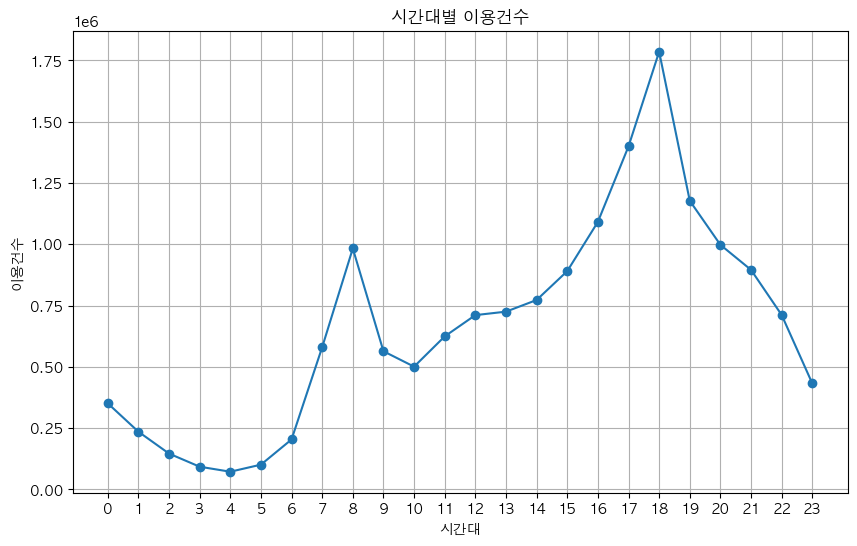

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("data/final_data.csv")

# 시간에 따른 이용건수의 합 계산
hourly_total = data.groupby('hour')['이용건수'].sum()

# 시간에 따른 이용건수 시각화
hourly_total.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('시간대별 이용건수')
plt.xlabel('시간대')
plt.ylabel('이용건수')
plt.xticks(range(24))
plt.grid(True)
plt.show()


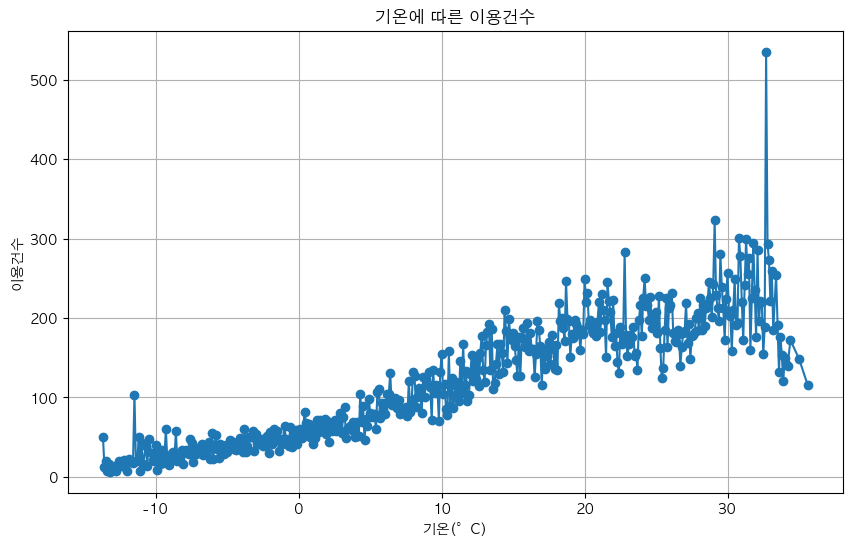

In [9]:
temperature_mean = data.groupby('기온(°C)')['이용건수'].mean()

# 기온에 따른 이용건수 시각화
temperature_mean.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('기온에 따른 이용건수')
plt.xlabel('기온(°C)')
plt.ylabel('이용건수')
plt.grid(True)
plt.show()

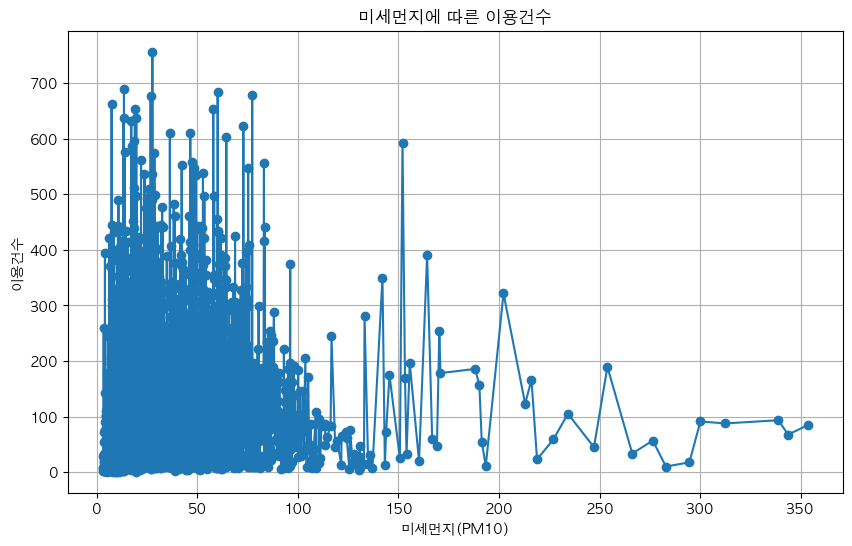

In [10]:
# 미세먼지에 따른 이용건수의 평균 계산
pm10_mean = data.groupby('미세먼지(PM10)')['이용건수'].mean()

# 미세먼지에 따른 이용건수 시각화
pm10_mean.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('미세먼지에 따른 이용건수')
plt.xlabel('미세먼지(PM10)')
plt.ylabel('이용건수')
plt.grid(True)
plt.show()

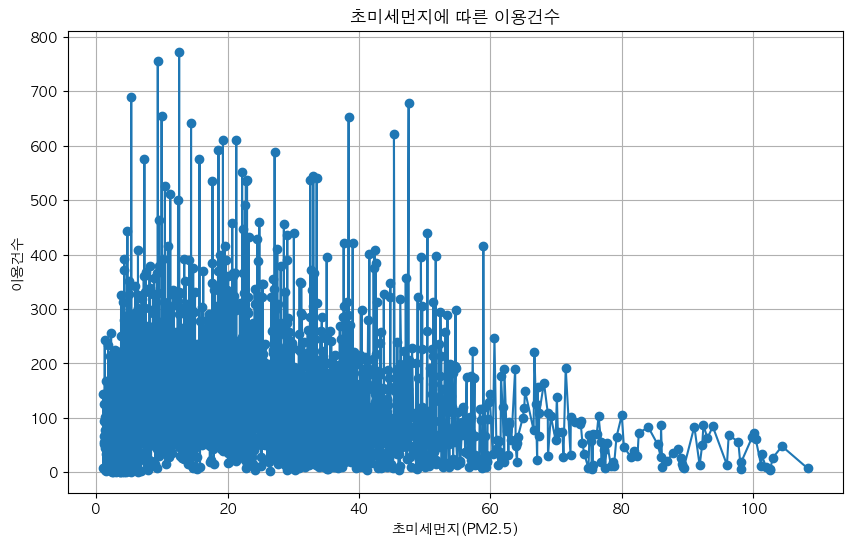

In [17]:
# 초미세먼지에 따른 이용건수의 평균 계산
pm25_mean = data.groupby('초미세먼지(PM2.5)')['이용건수'].mean()

# 초미세먼지와 이용건수 시각화
pm25_mean.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('초미세먼지에 따른 이용건수')
plt.xlabel('초미세먼지(PM2.5)')
plt.ylabel('이용건수')
plt.grid(True)
plt.show()


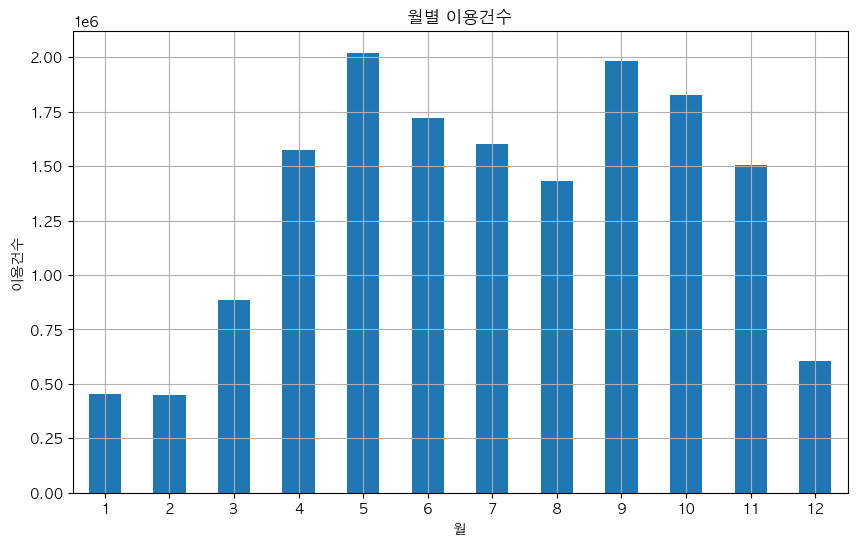

In [11]:

# 'month' 열을 기준으로 그룹화하여 이용건수의 합 계산
monthly_total = data.groupby('month')['이용건수'].sum()

# 월별 이용건수 시각화
monthly_total.plot(kind='bar', figsize=(10, 6))
plt.title('월별 이용건수')
plt.xlabel('월')
plt.ylabel('이용건수')
plt.xticks(rotation=0)  # x축 라벨 회전 없음
plt.grid(True)
plt.show()


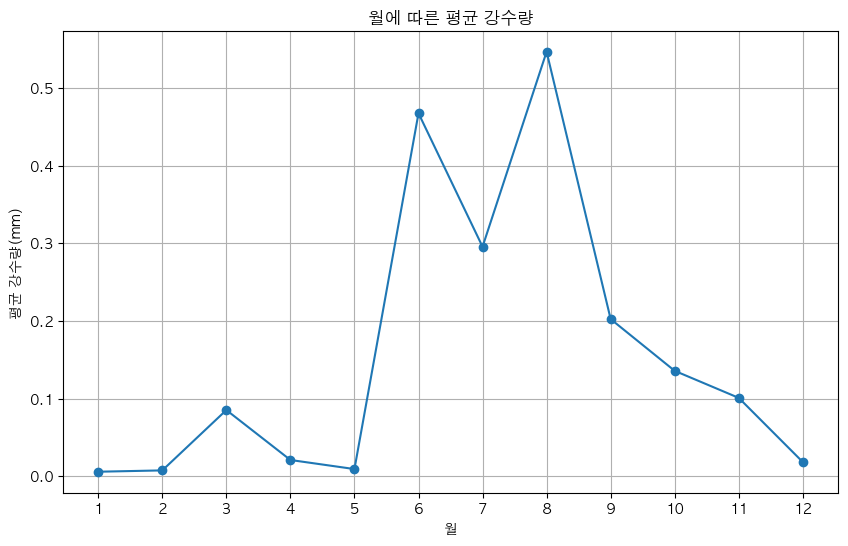

In [13]:

# 월별 강수량의 평균 계산
monthly_precipitation_mean = data.groupby('month')['강수량(mm)'].mean()

# 월별 강수량 시각화
monthly_precipitation_mean.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('월에 따른 평균 강수량')
plt.xlabel('월')
plt.ylabel('평균 강수량(mm)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


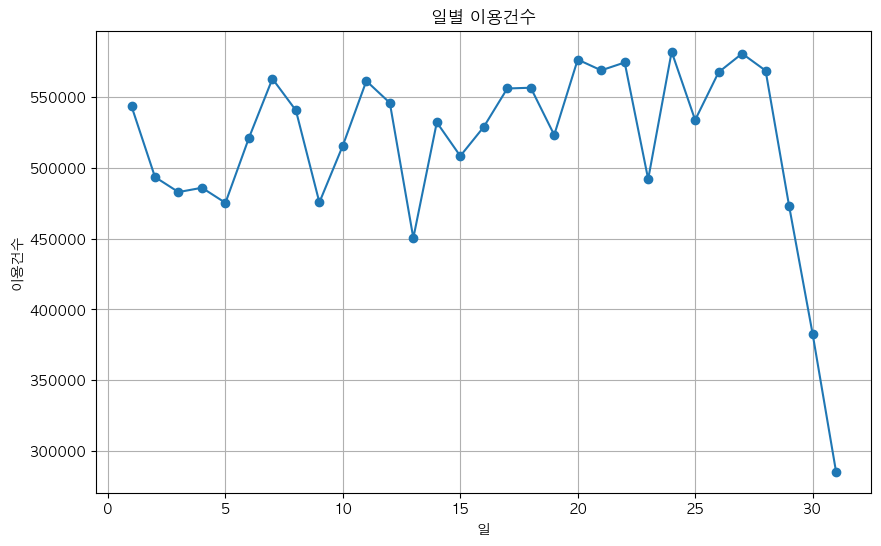

In [14]:

# 일별 이용건수의 합 계산
daily_total = data.groupby('day')['이용건수'].sum()

# 일별 이용건수 시각화
daily_total.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('일별 이용건수')
plt.xlabel('일')
plt.ylabel('이용건수')
plt.grid(True)
plt.show()


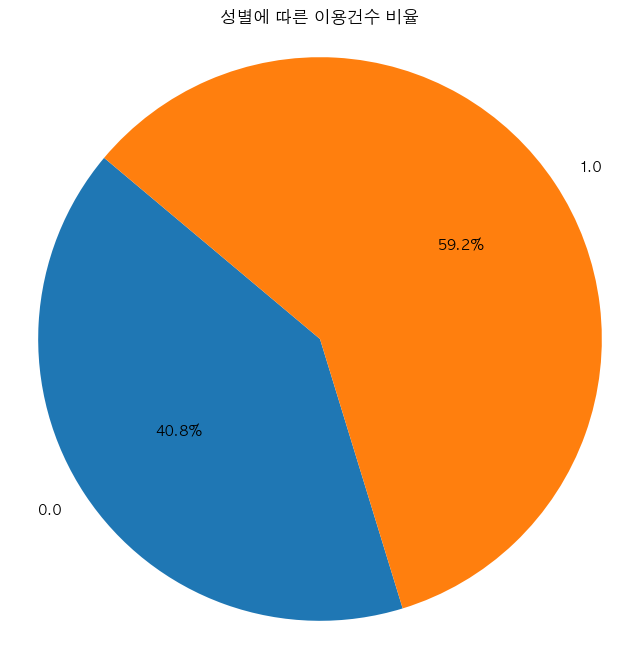

In [15]:


# 성별에 따른 이용건수의 합 계산
gender_total = data.groupby('성별')['이용건수'].sum()

# 원 그래프로 시각화
plt.figure(figsize=(8, 8))
plt.pie(gender_total, labels=gender_total.index, autopct='%1.1f%%', startangle=140)
plt.title('성별에 따른 이용건수 비율')
plt.axis('equal')  # 원 그래프를 원형으로 출력
plt.show()


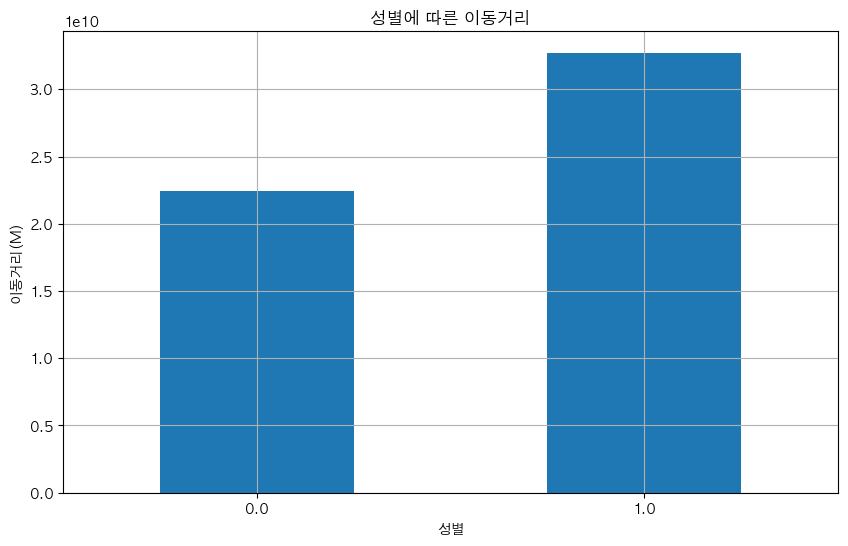

In [16]:

# 성별에 따른 이동거리의 합 계산
gender_distance_total = data.groupby('성별')['이동거리(M)'].sum()

# 막대 그래프로 시각화
gender_distance_total.plot(kind='bar', figsize=(10, 6))
plt.title('성별에 따른 이동거리')
plt.xlabel('성별')
plt.ylabel('이동거리(M)')
plt.xticks(rotation=0)  # x축 라벨 회전 없음
plt.grid(True)
plt.show()


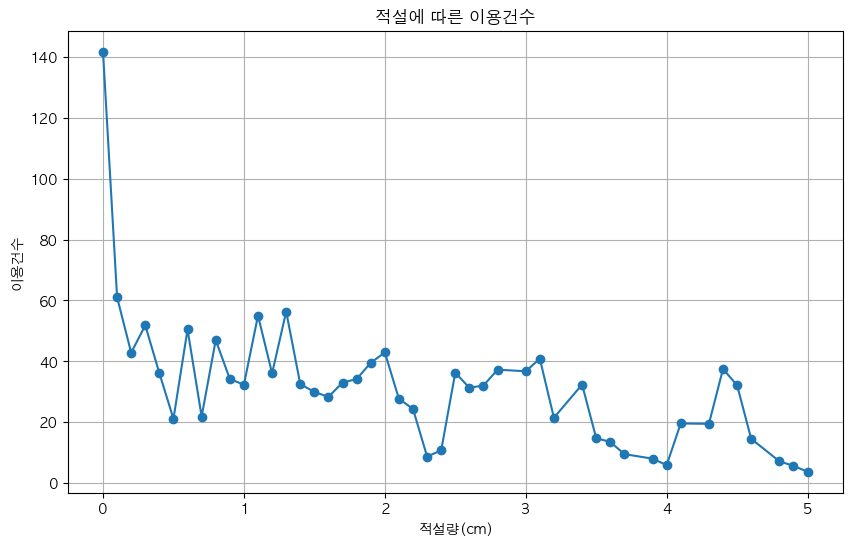

In [18]:
# 적설량에 따른 이용건수의 평균 계산
snow_mean = data.groupby('적설(cm)')['이용건수'].mean()

# 적설량과 이용건수 시각화
snow_mean.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('적설에 따른 이용건수')
plt.xlabel('적설량(cm)')
plt.ylabel('이용건수')
plt.grid(True)
plt.show()


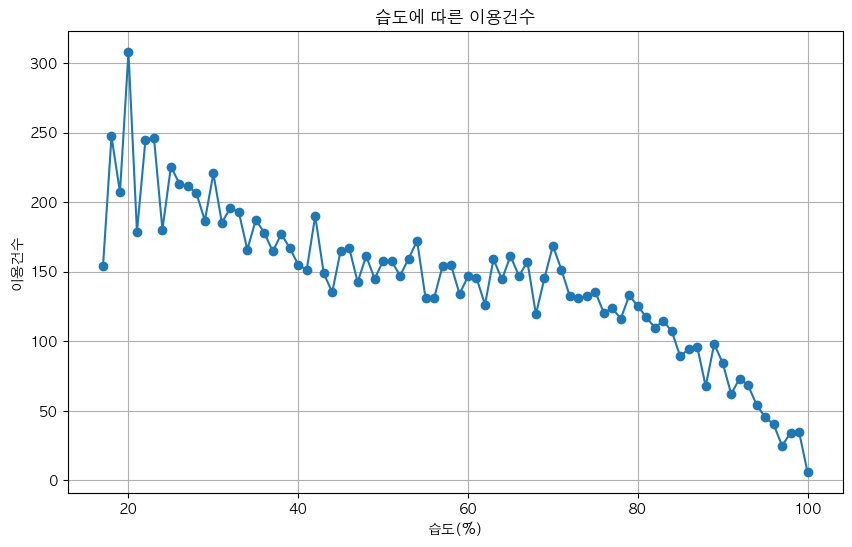

In [19]:
# 습도에 따른 이용건수의 평균 계산
humidity_mean = data.groupby('습도(%)')['이용건수'].mean()

# 습도와 이용건수 시각화
humidity_mean.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('습도에 따른 이용건수')
plt.xlabel('습도(%)')
plt.ylabel('이용건수')
plt.grid(True)
plt.show()


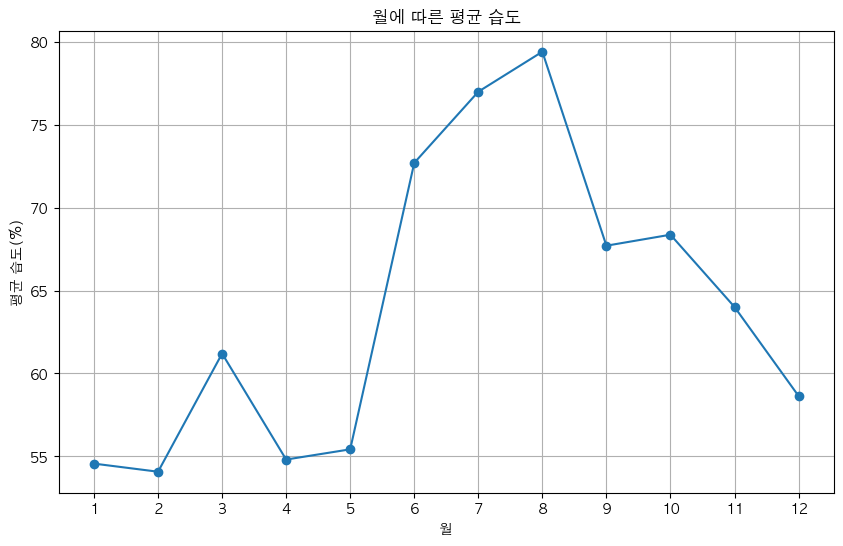

In [20]:
# 월별 습도의 평균 계산
monthly_humidity_mean = data.groupby('month')['습도(%)'].mean()

# 월에 따른 습도 시각화
monthly_humidity_mean.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('월에 따른 평균 습도')
plt.xlabel('월')
plt.ylabel('평균 습도(%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()
